# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [104]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
dados = pd.read_csv('housing.csv')
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
dados['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [83]:
mapping = {
    'NEAR BAY':1,
    '<1h OCEAN':2,
    'INLAND':3,
    'NEAR OCEAN':4,
    'ISLAND':5,
}
dados['ocean_proximity_numeric']= dados['ocean_proximity'].map(mapping)

dados['ocaen_proximity']= dados['ocean_proximity'].map(mapping)
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric,ocaen_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.0,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.0,1.0


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [84]:
dados.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_numeric',
       'ocaen_proximity'],
      dtype='object')

In [85]:
dados.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [86]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_numeric,ocaen_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,11399.000000,11399.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,2.833143,2.833143
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.000554,1.000554
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,1.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,3.000000,3.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,3.000000,3.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,3.000000,3.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000,5.000000


In [87]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20433 non-null  float64
 1   latitude                 20433 non-null  float64
 2   housing_median_age       20433 non-null  float64
 3   total_rooms              20433 non-null  float64
 4   total_bedrooms           20433 non-null  float64
 5   population               20433 non-null  float64
 6   households               20433 non-null  float64
 7   median_income            20433 non-null  float64
 8   median_house_value       20433 non-null  float64
 9   ocean_proximity          20433 non-null  object 
 10  ocean_proximity_numeric  11399 non-null  float64
 11  ocaen_proximity          11399 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.0+ MB


In [88]:
dados.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [89]:
dados = dados.dropna(subset = ['total_bedrooms'])

In [90]:
dados.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [91]:
matriz_corr = dados.corr(numeric_only=True)
matriz_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_numeric,ocaen_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.488920,0.488920
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.422531,-0.422531
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.267284,-0.267284
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.021397,0.021397
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.020078,0.020078
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.045666,0.045666
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.007412,0.007412
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.078506,-0.078506
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.133299,-0.133299
ocean_proximity_numeric,0.488920,-0.422531,-0.267284,0.021397,0.020078,0.045666,0.007412,-0.078506,-0.133299,1.000000,1.000000


<Axes: >

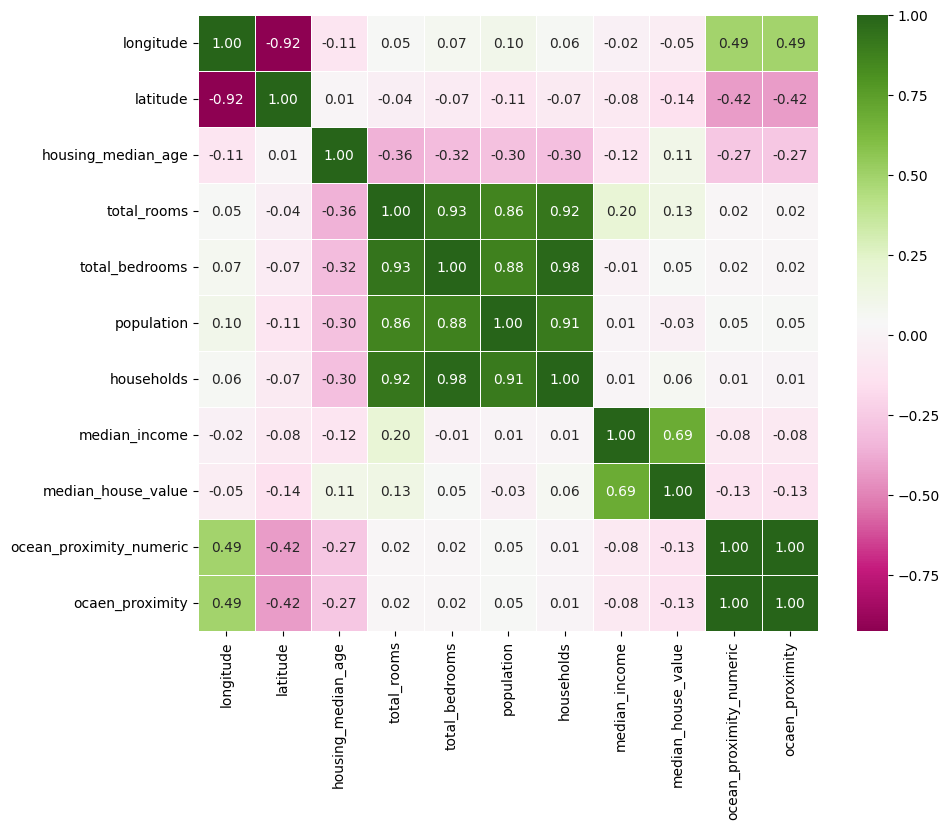

In [92]:
plt.figure(figsize= (10, 8))
sns.heatmap(matriz_corr, annot= True, cmap= 'PiYG', fmt= '.2f', linewidths= 0.5)

### 3. Separe os dados em validação e teste

In [93]:
X = dados[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
           'ocean_proximity_numeric']]
y = dados['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [94]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [95]:
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_1.predict(X_test))

template = 'O MSE da arvore com profundidade = {0} é: {1:2f}'

print(template.format(regr_1.get_depth(),mse1).replace(".", ","))
print(template.format(regr_2.get_depth(),mse2).replace(".", ","))

O MSE da arvore com profundidade = 2 é: 8798499918,555510
O MSE da arvore com profundidade = 8 é: 8798499918,555510


In [96]:
r_quadrado1 = regr_1.score(X_train, y_train)
r_quadrado2 = regr_2.score(X_train, y_train)

template = 'O r-quadrado da arvore com profundidade= {0} é: {1:2}'

print(template.format(regr_1.get_depth(), r_quadrado1).replace(".", ","))
print(template.format(regr_2.get_depth(), r_quadrado2).replace(".", ","))

O r-quadrado da arvore com profundidade= 2 é: 0,34498934563144357
O r-quadrado da arvore com profundidade= 8 é: 0,44489275072775514


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A arvore com profundidade= 8 possui um MSE mais adequado para utilizaçao.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

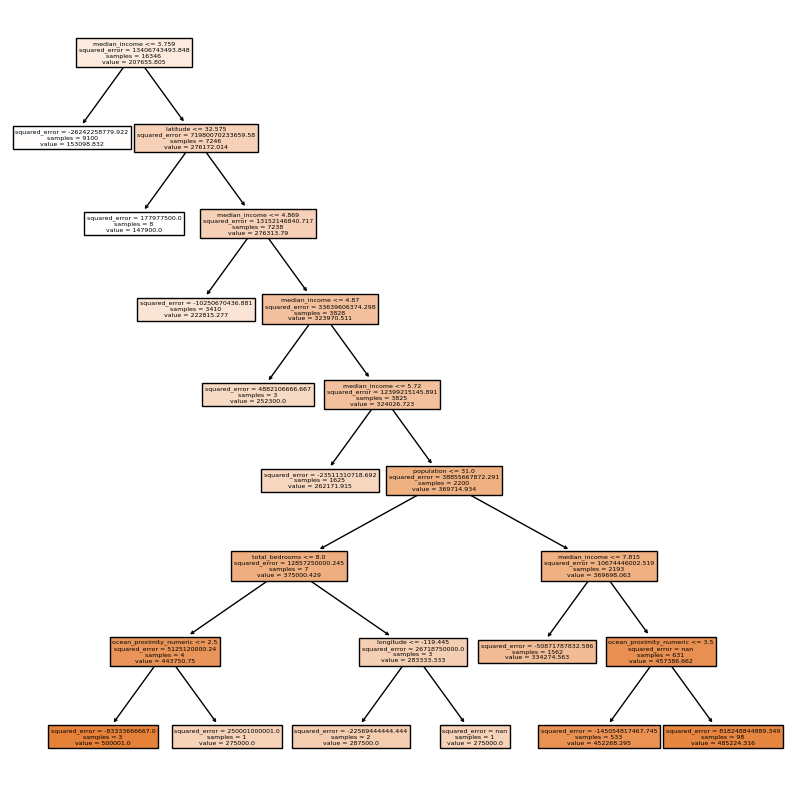

In [109]:
plt.figure(figsize= (10, 10))
plot_tree(regr_2,
          feature_names= X.columns,
          filled= True)
plt.show()